# dictionaries, sets, and function fitting
## 9/21/2021

<a href="?print-pdf">print view</a>

In [1]:
%%html

<script src="http://bits.csb.pitt.edu/asker.js/lib/asker.js"></script>

<script>

require(['https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.2.2/Chart.js'], function(Ch){
 Chart = Ch;
});

$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');


//the callback is provided a canvas object and data 
var chartmaker = function(canvas, labels, data) {
  var ctx = $(canvas).get(0).getContext("2d");
     var dataset = {labels: labels,                     
    datasets:[{
     data: data,
     backgroundColor: "rgba(150,64,150,0.5)",
         fillColor: "rgba(150,64,150,0.8)",    
  }]};
  var myBarChart = new Chart(ctx,{type:'bar',data:dataset,options:{legend: {display:false},scales:{yAxes:[{ticks:{min: 0}}]}}});


};

$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();



</script>

# Dictionary

A dictionary is an **unordered** collection of key,value pairs where the keys are mapped to values.  

A dictionary object is *indexed* by the key to get the value.

In [2]:
d = dict()
d['key'] = 'value'
d[0] = ['x','y','z']
print(d)

{'key': 'value', 0: ['x', 'y', 'z']}


# Initializing `dicts`

In [3]:
empty = dict()
alsoempty = {}

Specify *key*:*value* pairs within curly braces.

In [4]:
example = {'a': 1, 'b':2}
example

{'a': 1, 'b': 2}

Add new values by indexing with new/existing key

In [6]:
example['a'] = 0
example['z'] = 26
example

{'a': 0, 'b': 2, 'z': 26}

# Accessing values

In [7]:
example['c'] #keys must exist

KeyError: 'c'

Use **`in`** to test for membership

In [8]:
'c' in example 

False

In [9]:
if 'c' not in example:
    example['c'] = 0
example

{'a': 0, 'b': 2, 'z': 26, 'c': 0}

# Methods

In [10]:
example.keys()

dict_keys(['a', 'b', 'z', 'c'])

In [11]:
example.values()

dict_values([0, 2, 26, 0])

In [12]:
example.items()

dict_items([('a', 0), ('b', 2), ('z', 26), ('c', 0)])

In [13]:
def count(vals):
    cnts = {}
    for x in vals:
        cnts[x] += 1
    return cnts

In [ ]:
d = count(['a','a','b','a','c','b'])

In [14]:
%%html
<div id="dictdefault" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#dictdefault';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the value of <tt>d['a']</tt>?",
		answers: ["0","1","2","3","6",'Error'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# The Fix

In [15]:
def count(vals):
    cnts = {}
    for x in vals:
        if x not in cnts:
            cnts[x] = 0
        cnts[x] += 1
    return cnts

d = count(['a','a','b','a','c','b'])
d['a']

3

If this seems annoying, checkout [`collections.defaultdict`](https://docs.python.org/2/library/collections.html)

# Sets

 A set is an **unordered** collection with no duplicate elements. Basic uses include *membership testing* and *eliminating duplicate entries*. Set objects also support mathematical operations like union, intersection, difference, and symmetric difference.

Can initialize with a list

In [16]:
stuff = set(['a','b','a','d','x','a','e'])
stuff

{'a', 'b', 'd', 'e', 'x'}

Sets are not indexed - use `add` to insert new elements.

In [17]:
stuff.add('y')

# `set` operations

Efficient membership testing

In [18]:
'y' in stuff

True

In [19]:
stuff2 = set(['a','b','c'])
print('and',stuff & stuff2) #intersection

and {'b', 'a'}


In [20]:
print('or', stuff | stuff2)

or {'e', 'y', 'b', 'x', 'a', 'c', 'd'}


In [21]:
print('diff', stuff - stuff2)

diff {'x', 'y', 'e', 'd'}


In [22]:
s = set([1,2,2,3,3,3,4,4,4,4])

In [23]:
%%html
<div id="dictset" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#dictset';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is <tt>len(s)</tt>?",
		answers: ["0","1","3","4","9","10",'Error'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [24]:
a = set([1,2,2,3])
b = set([2,3,3,4])
c = a & b

In [25]:
%%html
<div id="setinter" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#setinter';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is <tt>c</tt>?",
		answers: ["{1,2,3,4}","{2,2,3,3}","{2,3}","{1,4}",'Error'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Tuples

A `tuple` is an *immutable* list.

In [26]:
t = tuple([1,2,3])
t

(1, 2, 3)

Tuples are initialized the same way as lists, just with parentheses

In [27]:
t = ('x',0,3.0)
l = ['x',0,3.0]
t,l

(('x', 0, 3.0), ['x', 0, 3.0])

In [28]:
'%s %d' % ('hello',3) # second operand of string % operator is tuple

'hello 3'

In [ ]:
t = ('x',0,3.0)
t[2] += 1

In [30]:
%%html
<div id="dictimm" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#dictimm';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the value of <tt>t[2]</tt>?",
		answers: ["0","1","3.0","4.0",'Error'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Keys

The keys of a dictionary or set should be *immutable*. Examples of immutable types are numbers, strings, tuples (that contain only immutable objects) and frozensets.

In [31]:
example[(1,2)] = 'a'

In [32]:
example[[1,2]] = 'a'

TypeError: unhashable type: 'list'

Dictionaries and sets efficiently store data based on the properties of the key - if the properties of the key can change, then the data structure is broken and the data is not where it should be.

# Efficiency

Imagine we have two lists, `l1` and `l2`, and we want do something with the items that are in common in both lists.  Here we'll just count them.

In [33]:
def listcnt(l1, l2):
    cnt = 0
    for x in l1:
            if x in l2:
                cnt += 1
    return cnt  

In [34]:
def setcnt(l1, l2):
    cnt = 0
    s1 = set(l1)
    s2 = set(l2)
    for x in s1:
            if x in s2:
                cnt += 1
    return cnt      

These two functions generate the same answer *if the lists have all distinct elements*.

In [35]:
%%html
<div id="dictspeed" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#dictspeed';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which function is faster?",
		answers: ['listcnt, by a lot','listcnt, by a little','about the same','setcnt, by a little','setcnt, by a lot'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [36]:
import time
l1 = list(range(40000))
l2 = list(range(1000,10000))

t0 = time.time()
listcnt(l1,l2)
t1 = time.time()
setcnt(l1,l2)
t2 = time.time()
print("listcnt time: ",t1-t0,'\nsetcnt time:',t2-t1)

listcnt time:  4.077635765075684 
setcnt time: 0.004424095153808594


Can you think of another way?

In [37]:
t0 = time.time()
len(set(l1) & set(l2))
t3 = time.time()
print("set intersection time:",t3-t0)

set intersection time: 0.0020401477813720703


# Do not do membership testing on lists

* Lists are *ordered* by the programmer, which means Python must examine *every* element to determine (non)membership.
* Dictionaries and sets are *unordered* so Python can store the contents in a way that makes membership testing efficient (using <a href="https://en.wikipedia.org/wiki/Hash_function">hashing</a>)

# Hashing 

The keys of sets and dictionaries must be *hashable* types.  Technically, this means they define methods `__eq__` (or `__cmp__`) and  `__hash__`.

A hash function (`__hash__`) takes an arbitrary object and produces a number.  Objects that are identical (according to `__eq__` or `__cmp__`) must hash to the same hash value. 

### What does this get us?

Accessing an element of an array of elements in memory (random access...) is as simple as computing a memory address (base of array plus offset).  This is **great** if our keys are a dense array of integers (then we have a lookup table).

Hash functions provide a way to quickly index into an array of data even when are keys are arbitray objects.



# Hashing

<center><img  src='http://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Hash_table_5_0_1_1_1_1_1_LL.svg/450px-Hash_table_5_0_1_1_1_1_1_LL.svg.png'></center>

In this figure (from Wikipedia), *collisions* are resolved through chaining.<br>
With a good hash function and enough buckets, no chain (list) will be more than a few elements long and accessing our data will be constant time (on average).
The position of an element in the table is determined by its hash value and the *table size*. 

   `position = obj.__hash__() % table_size`



# Hash Functions

A good hash function of an object has the following properties:

*  The hash value is fully determined by the object (*deterministic*).
*  The hash function uses all the object's data (if relevant). 
*  The hash function is *uniform* (evenly distributes keys across the range) 

The *range* of the hash function is usual the integers ($2^{32}$ or $2^{64}$).


In [38]:
print(hash(3), hash(1435080909832), hash('cat'), hash((3,'cat')))

3 1435080909832 -8257565457473944838 -8733718446622029835


# Implementing a Hash Function

You only need to implement a hash function when defining your own object types (which we haven't talked about yet...)

The best (and easiest) approach is to combine the built-in hash functions on your data.  

In [39]:
a = 'cat'
b = 'dog'
print(hash(a))
print(hash(b))
print(hash( (a,b) ))

-8257565457473944838
-6226553178208338080
1451804004006005960


# Takeaway

`sets`, `frozensets`, and `dicts` use hashing to provide extremely efficient **membership testing** and (for `dicts`) **value lookup**. 

However, you **cannot** rely on the order of data in these data structures.  In fact, the order of items will change as you add and delete.

In [40]:
s = set([3,999])
s

{3, 999}

In [41]:
s.add(1000)

In [42]:
print(s)
s.update([1001,1002,1003])

{1000, 3, 999}


In [43]:
print(s)

{3, 999, 1000, 1001, 1002, 1003}


# Function fitting

`numpy.polyfit` - polynomial fitting

`scipy.optimize.curve_fit` - arbitrary functions

# polyfit

Takes $x$ values, $y$ values, and degree of polynomial.  Returns coefficients with least squares fit (highest degree first).

In [44]:
%%html
<div id="polydeg" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#polydeg';
	jQuery(divid).asker({
	    id: divid,
	    question: "What degree is the polynomial 4x^2 + 5x - 3?",
		answers: ['1','2','3','4','5'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [45]:
import numpy as np
xvals = np.linspace(-1,2,20) 
yvals = xvals**3 +np.random.random(20) #adds random numbers from 0 to 1 to 20 values of xvals

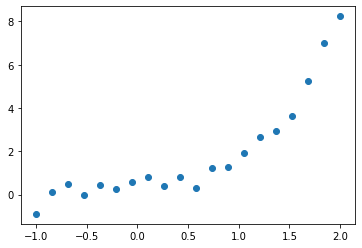

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xvals,yvals,'o');

# polyfit

In [47]:
deg1 = np.polyfit(xvals,yvals,1)
deg2 = np.polyfit(xvals,yvals,2)
deg3 = np.polyfit(xvals,yvals,3)

In [48]:
deg1

array([2.24860435, 0.74761374])

In [49]:
deg2

array([ 1.41331199,  0.83529236, -0.07061951])

In [50]:
%%html
<div id="deg3" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#deg3';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the expected value of deg3[-1]?",
		answers: ['-1','0','0.5','1'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [51]:
%%html
<div id="deg3_2" style="width: 500px"></div>
<script>
$('head').append('<link rel="stylesheet" href="http://bits.csb.pitt.edu/asker.js/themes/asker.default.css" />');

    var divid = '#deg3_2';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is the expected value of deg3[0]?",
		answers: ['-1','0','0.5','1'],
        server: "http://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [52]:
deg3

array([ 0.96709705, -0.03733359,  0.12242663,  0.52758761])

In [53]:
deg3[-1]

0.5275876115133333

# poly1d

Construct a polynomial function from coefficients

In [54]:
p1 = np.poly1d(deg1)
p2 = np.poly1d(deg2)
p3 = np.poly1d(deg3)
p1(2),p2(2),p3(2)

(5.244822435483533, 7.253213157046696, 8.359882943143173)

In [55]:
p1(0),p2(0),p3(0)

(0.7476137436937703, -0.0706195132393695, 0.5275876115133333)

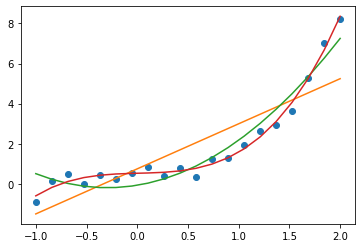

In [56]:
plt.plot(xvals,yvals,'o',xvals,p1(xvals),'-',xvals,p2(xvals),'-',xvals,p3(xvals),'-'); 

# scipy.optimize.curve_fit

Optimize fit to an arbitrary function.  Returns optimal values (for least squares) of parameters along with covariance estimate.  

Provide python function that takes *x* value and any parameters.

In [57]:
from scipy.optimize import curve_fit

def tanh(x,a,b):
    return b*np.tanh(a+x)

popt,pconv = curve_fit(tanh, xvals, yvals)
popt

array([0.32402799, 3.50165788])

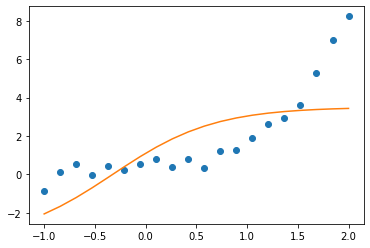

In [58]:
plt.plot(xvals,yvals,'o',xvals,popt[1]*np.tanh(popt[0]+xvals)); plt.show()

# Let's Analyze Data!


In [59]:
!wget https://asinansaglam.github.io/python_bio_2022/files/kd
!wget https://asinansaglam.github.io/python_bio_2022/files/aff.min
!wget https://asinansaglam.github.io/python_bio_2022/files/aff.score

--2021-09-20 20:35:40--  https://asinansaglam.github.io/python_bio_2022/files/kd
Resolving mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)... 136.142.4.139
Connecting to mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5262 (5.1K)
Saving to: ‘kd’

kd                  100%[===================>]   5.14K  --.-KB/s    in 0.04s   

2021-09-20 20:35:41 (121 KB/s) - ‘kd’ saved [5262/5262]

--2021-09-20 20:35:41--  https://asinansaglam.github.io/python_bio_2022/files/aff.min
Resolving mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)... 136.142.4.139
Connecting to mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5678 (5.5K)
Saving to: ‘aff.min’

aff.min             100%[===================>]   5.54K  --.-KB/s    in 0.04s   

2021-09-20 20:35:41 (143 KB/s) - ‘aff.min’ saved [5678/5678]

--2021-09-20 20:35:41--  https://

In [60]:
!head kd

set1_1  3.34 
set1_100  6.3 
set1_102  8.62 
set1_103  6.44 
set1_104  -0.15 
set1_105  8.48 
set1_106  7.01 
set1_107  4.61 
set1_108  7.55 
set1_109  7.96 


`kd` contains experimental values while `aff.min` and `aff.score` contain computational predictions of the experimental values.  Each line has a name and value.

How good are the predictions?

## How do we want to load and store the data?

The rows of the provided files are **not** in the same order.

We only care about points that are in **all three files**.

**Hint:** use dictionary to associate names with values.

In [61]:
import numpy as np

def makedict(fname):
    f = open(fname)
    retdict = {}
    for line in f:
        (name,value) = line.split()
        retdict[name] = float(value)
    return retdict

kdvalues = makedict('kd')
scorevalues = makedict('aff.score')
minvalues = makedict('aff.min')

names = []
kdlist = []
scorelist = []
minlist = []
for name in sorted(kdvalues.keys()):
    if name in scorevalues and name in minvalues:
        names.append(name)
        kdlist.append(kdvalues[name])
        scorelist.append(scorevalues[name])
        minlist.append(minvalues[name])
        
kds = np.array(kdlist)
scores = np.array(scorelist)
mins = np.array(minlist)

# How do we want to visualize the data?

Plot experiment value vs. predicted values (two series, scatterplot).

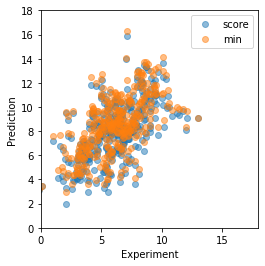

In [62]:
%matplotlib inline
import matplotlib.pylab as plt
plt.plot(kds,scores,'o',alpha=0.5,label='score')
plt.plot(kds,mins,'o',alpha=0.5,label='min')
plt.legend(numpoints=1)
plt.xlim(0,18)
plt.ylim(0,18)
plt.xlabel('Experiment')
plt.ylabel('Prediction')
plt.gca().set_aspect('equal')
plt.show()

# Aside: Visualizing dense 2D distributions

`seaborn` - extends `matplotlib` to make some hard things easy

/Library/Python/3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


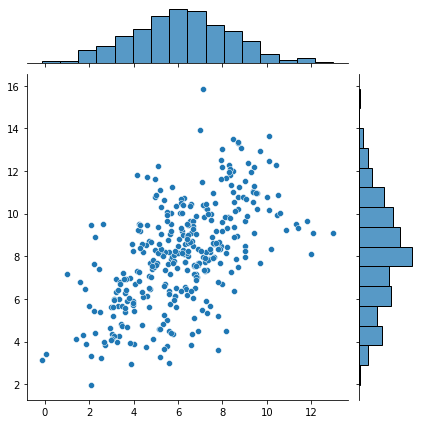

In [65]:
import seaborn as sns  # package that sits on top of 
sns.jointplot(kds,scores);

/Library/Python/3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


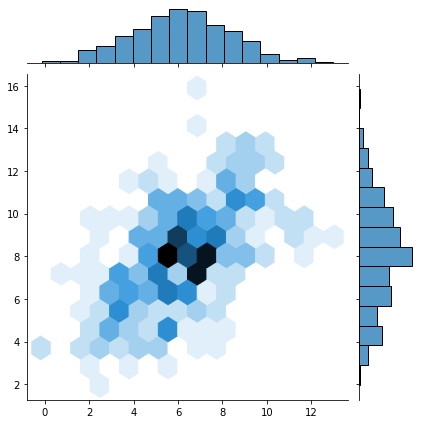

In [66]:
sns.jointplot(kds,scores,kind='hex');

/Library/Python/3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


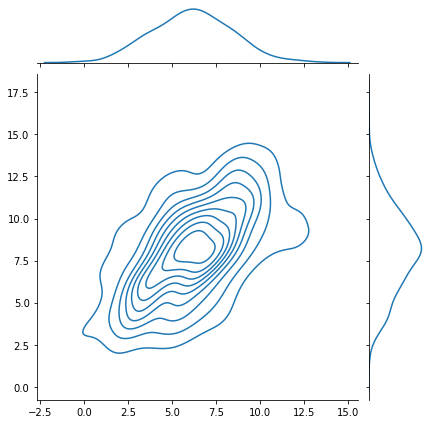

In [68]:
sns.jointplot(kds,scores,kind='kde');

# What is the error?

Average absolute? Mean squared?

In [69]:
print("Scores absolute average error:",np.mean(np.abs(scores-kds)))
print("Mins absolute average error:",np.mean(np.abs(mins-kds)))

Scores absolute average error: 2.3590879883381928
Mins absolute average error: 2.682967900874636


In [70]:
print("Scores Mean squared error:",np.mean(np.square(scores-kds)))
print("Mins Mean squared error:",np.mean(np.square(mins-kds)))

Scores Mean squared error: 8.165401751357434
Mins Mean squared error: 10.058501106196793


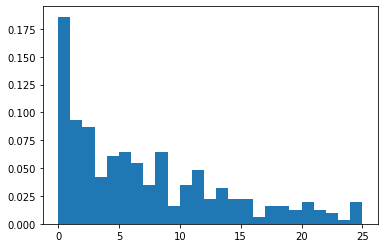

In [71]:
plt.hist(np.square(kds-mins),25,(0,25),density=True)
plt.show()

In [72]:
ave = np.mean(kds)
print("Average experimental value",ave)
print("Error of predicting the average",np.mean(np.square(kds-ave)))

Average experimental value 6.154081632653062
Error of predicting the average 4.956176343190337


# Do the predictions correlate with the observed values?

Compute correlations: np.corrcoef, scipy.stats.pearsonr, scipy.stats.spearmanr, scipy.stats.kendalltau

In [73]:
np.corrcoef(kds,scores)

array([[1.        , 0.58006564],
       [0.58006564, 1.        ]])

In [74]:
np.corrcoef(kds,mins)

array([[1.        , 0.59026701],
       [0.59026701, 1.        ]])

In [75]:
import scipy.stats as stats
stats.pearsonr(kds,scores)

(0.5800656427326171, 3.1321668954861346e-32)

In [76]:
stats.spearmanr(kds,scores)

SpearmanrResult(correlation=0.5843897097494348, pvalue=8.484372310278012e-33)

In [77]:
stats.kendalltau(kds,scores)

KendalltauResult(correlation=0.4128988002305019, pvalue=4.122713715359224e-30)

# What is the linear relationship?

In [78]:
fit = np.polyfit(kds,scores,1)
fit

array([0.62828046, 4.19091432])

In [79]:
line = np.poly1d(fit) #converts coefficients into function
line(3)

6.075755700166205

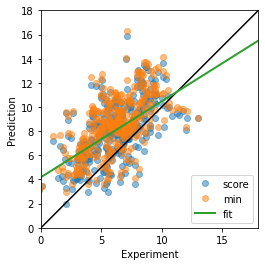

In [80]:
xpoints = np.linspace(0,18,100) #make 100 xcoords
plt.plot(kds,scores,'o',alpha=0.5,label='score')
plt.plot(kds,mins,'o',alpha=0.5,label='min')
plt.xlim(0,18)
plt.ylim(0,18)
plt.xlabel('Experiment')
plt.ylabel('Prediction')
plt.gca().set_aspect('equal')

plt.plot(xpoints,xpoints,'k')
plt.plot(xpoints,line(xpoints),label="fit",linewidth=2)
plt.legend(loc='lower right')
plt.show()

# What happens if we rescale the predictions?

Apply the linear fit to the predicted values.

In [81]:
f2 = np.polyfit(scores,kds,1)
print("Fit:",f2)
fscores = scores*f2[0]+f2[1]
print("Scores Mean squared error:",np.mean(np.square(scores-kds)))
print("Fit Scores Mean squared error:",np.mean(np.square(fscores-kds)))

Fit: [0.53555088 1.83893211]
Scores Mean squared error: 8.165401751357434
Fit Scores Mean squared error: 3.2885412091132413


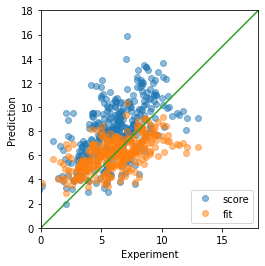

In [82]:
plt.plot(kds,scores,'o',alpha=0.5,label='score')
plt.plot(kds,fscores,'o',alpha=0.5,label='fit')
plt.xlim(0,18)
plt.ylim(0,18)
plt.xlabel('Experiment')
plt.ylabel('Prediction')
plt.gca().set_aspect('equal')

plt.plot(xpoints,xpoints)
plt.legend(loc='lower right')
plt.show()

In [83]:
stats.pearsonr(kds,fscores)

(0.5800656427326171, 3.1321668954861346e-32)